# Introduction to Regression with Neural Network in Tensorflow

There are many definition for a regression problem but in our case, we are going to simplify it. 
Predicting a numerical variable based on some other combination of variables, even shorter...
predicting a number.


In [2]:
# Import Tensorflow 
import tensorflow as tf
print(tf.__version__)

2.10.0


## Create some data to view and fit

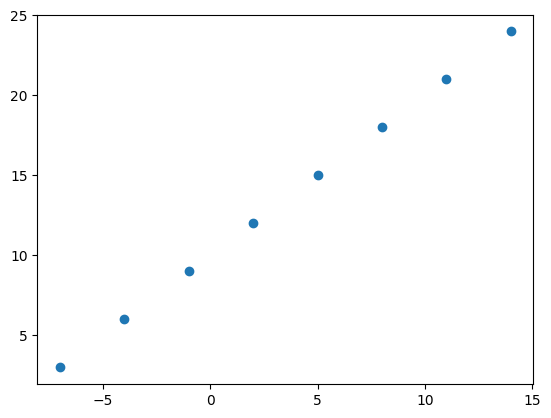

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Create features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create Labels

y = np.array([3.0, 6.0, 9.0, 12.0,15.0,18.0,21.0,24.0])

#visualize it
plt.scatter(X,y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [4]:
# Create a demo tensor for our housing prediction problem

house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
#Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

### Steps in modelling with tensorflow

1. Creating a Model - define the input and output layers, as well as hidden layers of a deep learning model.
2. Compiling a model - Define the loss function, the function which tells our model how wrong it is and the optimizer
    it tells us how to improve our model. And Evaluation Metrics 
3. Fitting a model - letting the model try to find patterns between X & y (feature and labels)

In [9]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"]) #Stochaistic gradient descent

#3. Fit de Model
model.fit(tf.expand_dims(X, axis=-1),y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 784ms/step - loss: 10.3687 - mae: 10.3687
Epoch 2/10
1/1 [==============================] - 0s 5ms/step - loss: 10.2362 - mae: 10.2362
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 10.1037 - mae: 10.1037
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 9.9712 - mae: 9.9712
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 9.8387 - mae: 9.8387
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 9.7062 - mae: 9.7062
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 9.5737 - mae: 9.5737
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 9.4412 - mae: 9.4412
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 9.3087 - mae: 9.3087
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 9.1762 - mae: 9.1762


In [10]:
#Check out X and Y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
#Try and make a prediction using our model

y_pred = model.predict([20.0])
y_pred

1/1 [==============================] - 0s 71ms/step


array([[24.993067]], dtype=float32)

In [12]:
y_pred + 7.5

array([[32.493065]], dtype=float32)

## Improve a Model 

We can improve a model by altering the steps we took to create a model.

1. Creating a model - Here we might add more layers, increase the number of hidden units or Neurons. Change Activation function of each layers
2. Compiling a model - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. Fitting a Model - Here we might a model for more epochs, train it for longer. Or provide more data for learning

In [13]:
#Lets rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 200ms/step - loss: 14.1176 - mae: 14.1176
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.9851 - mae: 13.9851
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 13.8526 - mae: 13.8526
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.7201 - mae: 13.7201
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5876 - mae: 13.5876
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 13.4551 - mae: 13.4551
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 13.3226 - mae: 13.3226
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 13.1901 - mae: 13.1901
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 13.0576 - mae: 13.0576
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 12.9251 - mae: 12.9251
Epoch 11/100
1/1 [==============================] - 0s 4m

In [14]:
#test prediction
model.predict([17.0])

1/1 [==============================] - 0s 53ms/step


array([[29.417727]], dtype=float32)

In [15]:
#Lets rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1),y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 13.5394 - mae: 13.5394
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 12.1370 - mae: 12.1370
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9011 - mae: 10.9011
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7831 - mae: 9.7831
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 8.4876 - mae: 8.4876
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 6.9069 - mae: 6.9069
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 4.9880 - mae: 4.9880
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 4.2445 - mae: 4.2445
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1909 - mae: 5.1909
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 5.9131 - mae: 5.9131
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 7ms/step - loss: 0.4131 - mae: 0.4131
Epoch 90/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4488 - mae: 0.4488
Epoch 91/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3101 - mae: 0.3101
Epoch 92/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2071 - mae: 0.2071
Epoch 93/100
1/1 [==============================] - 0s 6ms/step - loss: 0.5222 - mae: 0.5222
Epoch 94/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4734 - mae: 0.4734
Epoch 95/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2242 - mae: 0.2242
Epoch 96/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2946 - mae: 0.2946
Epoch 97/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6106 - mae: 0.6106
Epoch 98/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4303 - mae: 0.4303
Epoch 99/100
1/1 [==============================] - 0s 6ms/step - loss: 0.4521 - ma

In [16]:
model.predict([17.0, 20.0, 23.0])

1/1 [==============================] - 0s 69ms/step


array([[26.10041 ],
       [29.288012],
       [32.589027]], dtype=float32)

## Evaluating a Model

In practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaluate it - > tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evualiation....there are 3 words you should memorize:
```
Visualize, Visualize, Visualize
```
Is a good idea to visualize:
The Data - What data are we working with. What does it look like?
The Model itself - What does are model look like
The training of a model - how does a model perform while trains
The predictions of the model - how do the predictions of a model line up

In [9]:
#Testing with a new model and prediction

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [10]:
# Make labels for the Datasets

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

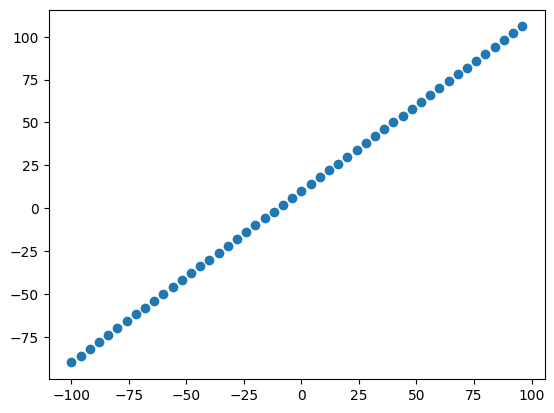

In [11]:
#Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

### The 3 sets...

* **Training set** - Model learns from this data typically 70-80% of the total data you have
* **Validation set** - The model gets tuned on this data, which is typically 10-15% of available data
* **Test Set** - The Model gets evaluated on this data to test what it learned. This set is typically 10-15% of the total data available.

In [12]:
# Check the lenght of how many samples we have
len(X)

50

In [13]:
# Split the Data into train and test

X_train = X[:40] # frist 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the Data)
y_test = y[40:]

len(X_train), len(X_test), len(y_test), len(y_train)

(40, 10, 10, 40)

### Visualizing the Data

Now we got our data split. Let's visualize it again

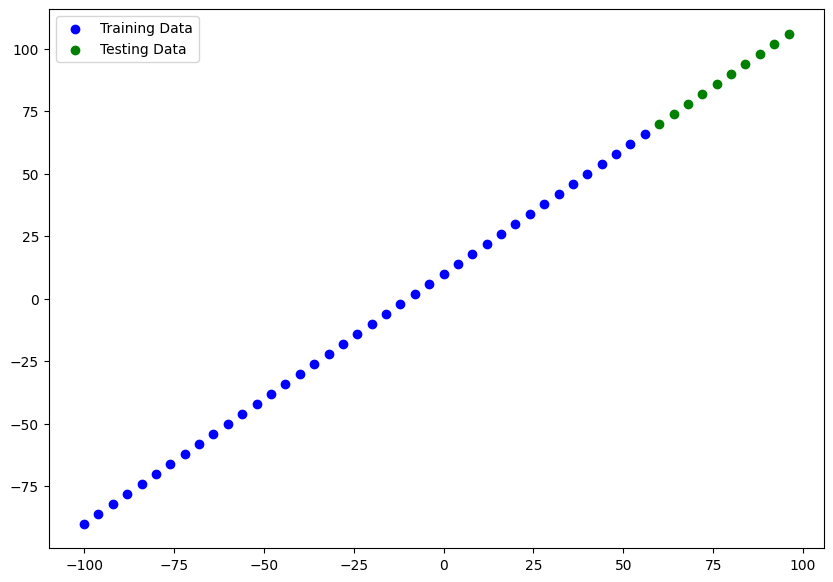

In [14]:
plt.figure(figsize=(10,7))
#plot taining data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
#plot Test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
#show a legend
plt.legend();

In [23]:
#Let's have a look at how to build a neural network for our data

# 1. Create a model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. fit the model
#model.fit(X_train, y_train, epochs=100)

In [24]:
#Visualizing the Model

#model.summary()

In [25]:
# Lets a build a model that builds automatically defining the input_shape

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Total params - total number of parameters in the model
Trainable params - these are the parameters, patterns the model can update as it trains
Non Trainable params - these parameters arent update during training. This is typical already trained parameters

📖 **Resourse:** For more indepth information about trainable parameters within a layer, check out MIT Introduction to Deep Learning Video
introtodeeplearning

In [18]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, name="output_layer"),
], name="Model_1")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

In [19]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 2s 8ms/step - loss: 38.1024 - mae: 38.1024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 34.4813 - mae: 34.4813
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 31.2749 - mae: 31.2749
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 28.0964 - mae: 28.0964
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 25.0557 - mae: 25.0557
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 22.0676 - mae: 22.0676
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7803 - mae: 18.7803
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 15.3848 - mae: 15.3848
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 12.6588 - mae: 12.6588
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3596 - mae: 11.3596
Epoch 11/100
2/2 [==============================] - 0s 8ms/

In [21]:
# Get a summary of a model

model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 64)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [64]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### To visualize predictions

To visualize predictions it's a good idea to plot them agains the ground of truth

In [26]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 77ms/step


array([[ 73.62869 ],
       [ 78.42958 ],
       [ 83.230484],
       [ 88.03139 ],
       [ 92.832275],
       [ 97.63319 ],
       [102.43408 ],
       [107.234985],
       [112.03587 ],
       [116.83678 ]], dtype=float32)

In [27]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [31]:
# Lets create a plotting function

def plot_prediction(train_data = X_train,
                   train_labels=y_train,
                   test_data=X_test,
                    test_labels=y_test,
                   predictions=y_pred):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='g', label="Testing Data")
    plt.scatter(test_data, predictions, c='r', label="Predictions")
    plt.legend();

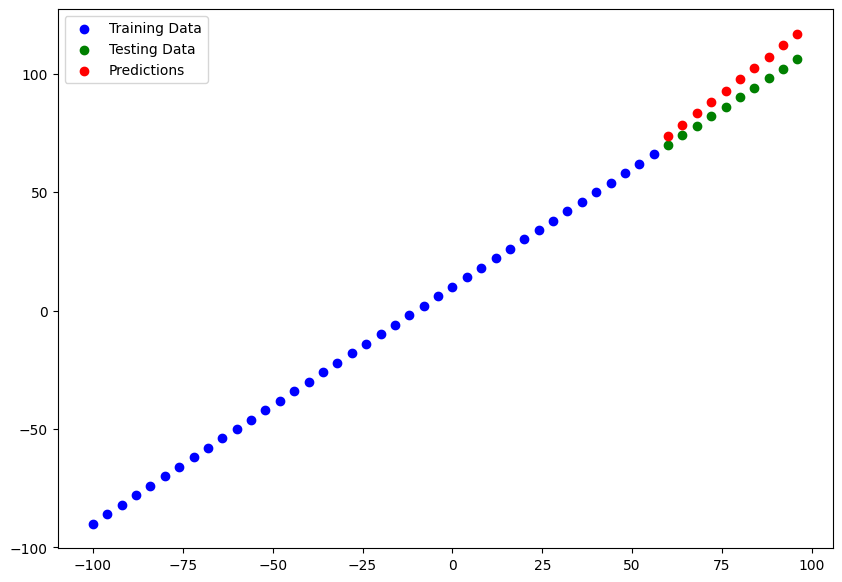

In [29]:
plot_prediction()

### Evaluating our model with an evaluation metrics

Depending on the problem you are working on, there will be different evaluation metrics to evaluate your model performance

Since we are working with regression two of the main metrics:

* MAE - Mean Absolute Error, "On Average how wrong is each of my model's prediction

* MSE - Mean Squared Error, "Square the Average errors"

In [69]:
# Evaluate the model on the test set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 347ms/step - loss: 6.6662 - mae: 6.6662


[6.6661696434021, 6.6661696434021]

In [70]:
y_pred

array([[ 73.1731  ],
       [ 77.94934 ],
       [ 82.72558 ],
       [ 87.501816],
       [ 92.278046],
       [ 97.05429 ],
       [101.83052 ],
       [106.606766],
       [111.382996],
       [116.15924 ]], dtype=float32)

In [71]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [72]:
#Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([15.461517, 12.430395, 10.654884, 10.      , 10.455609, 12.021716,
       14.698313, 18.606766, 23.382996, 28.15924 ], dtype=float32)>

In [73]:
y_test - y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ -3,   1,   5,   9,  13,  17,  21,  25,  29,  33],
       [ -7,  -3,   1,   5,   9,  13,  17,  21,  25,  29],
       [-12,  -8,  -4,   0,   4,   8,  12,  16,  20,  24],
       [-17, -13,  -9,  -5,  -1,   3,   7,  11,  15,  19],
       [-22, -18, -14, -10,  -6,  -2,   2,   6,  10,  14],
       [-27, -23, -19, -15, -11,  -7,  -3,   1,   5,   9],
       [-31, -27, -23, -19, -15, -11,  -7,  -3,   1,   5],
       [-36, -32, -28, -24, -20, -16, -12,  -8,  -4,   0],
       [-41, -37, -33, -29, -25, -21, -17, -13,  -9,  -5],
       [-46, -42, -38, -34, -30, -26, -22, -18, -14, -10]])>

### Running experiments to improve our model

To improve your model
1. Get more Data
2. Make your model more larger or complex
3. Train for longer - more iterations

### Build `model_1`

In [15]:
X_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56])>

In [16]:
y_train

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])>

In [23]:
#Set random seed
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1], name="input_layer")
])

model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 31.7166 - mae: 31.7166
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 8.9053 - mae: 8.9053
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 9.7724 - mae: 9.7724
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9482 - mae: 11.9482
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0125 - mae: 11.0125
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1728 - mae: 10.1728
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1904 - mae: 9.1904
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1270 - mae: 9.1270
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 11.7363 - mae: 11.7363
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 13.6544 - mae: 13.6544
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 11.5031 - mae: 11.5031
Epoch 89/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7937 - mae: 7.7937
Epoch 90/100
2/2 [==============================] - 0s 4ms/step - loss: 10.9172 - mae: 10.9172
Epoch 91/100
2/2 [==============================] - 0s 5ms/step - loss: 6.7407 - mae: 6.7407
Epoch 92/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1096 - mae: 10.1096
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6014 - mae: 7.6014
Epoch 94/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2336 - mae: 9.2336
Epoch 95/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8251 - mae: 10.8251
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 10.2834 - mae: 10.2834
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6741 - mae: 7.6741
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 8

In [24]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 19ms/step


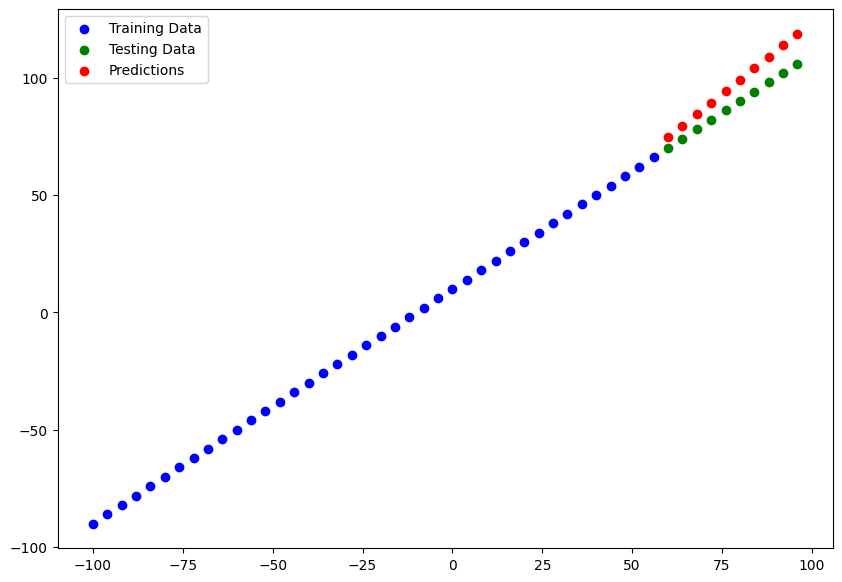

In [32]:
# Make and plot for model_1

y_pred_1 = model_1.predict(X_test)
plot_prediction(predictions=y_pred_1)

In [34]:
#Make some function to calculate mae and mse to be reutilize later

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true= y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))

In [37]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.666227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=81.63689>)

In [40]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mse"])

model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 47.9949 - mse: 3405.3848
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 31.2165 - mse: 1304.2419
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 36.2073 - mse: 1973.0566
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.6350 - mse: 1116.7339
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 15.0644 - mse: 286.0727
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.9828 - mse: 173.0415
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.3128 - mse: 155.2308
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1611 - mse: 166.4583
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.2179 - mse: 2694.8364
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 28.5170 - mse: 1147.7512
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 21ms/step


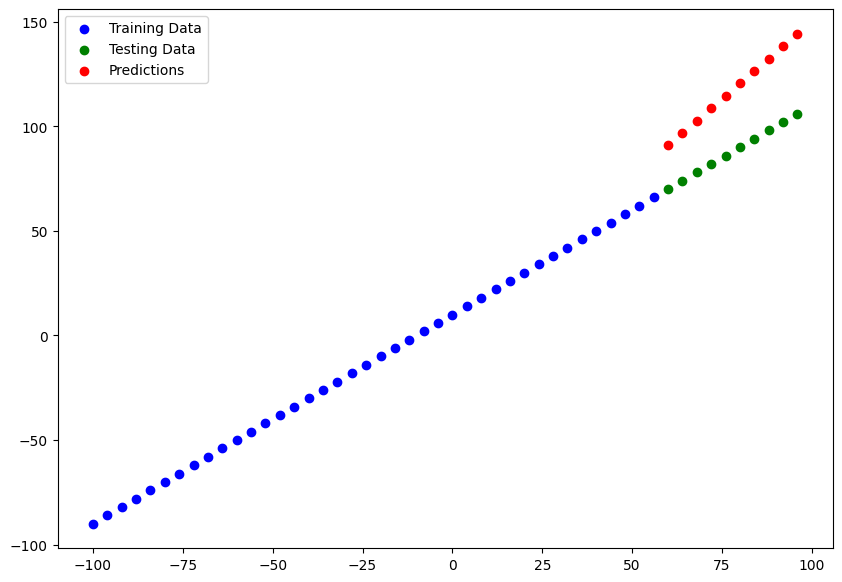

In [43]:
#Make and plot predictions for model_2

y_preds_2 = model_2.predict(X_test)
plot_prediction(predictions=y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.525415>,
 <tf.Tensor: shape=(), dtype=float32, numpy=902.5707>)

In [51]:
#Build Model 3

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_shape=[1]),
    tf.keras.layers.Dense(512),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["mae"])

model_2.fit(X_train, y_train, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 8ms/step - loss: 31.6827 - mse: 1405.5219
Epoch 2/250
2/2 [==============================] - 0s 5ms/step - loss: 12.4394 - mse: 270.8316
Epoch 3/250
2/2 [==============================] - 0s 6ms/step - loss: 18.7728 - mse: 576.2275
Epoch 4/250
2/2 [==============================] - 0s 5ms/step - loss: 31.7112 - mse: 1510.3390
Epoch 5/250
2/2 [==============================] - 0s 5ms/step - loss: 13.7716 - mse: 275.4280
Epoch 6/250
2/2 [==============================] - 0s 10ms/step - loss: 12.5438 - mse: 242.2212
Epoch 7/250
2/2 [==============================] - 0s 6ms/step - loss: 13.9337 - mse: 273.4825
Epoch 8/250
2/2 [==============================] - 0s 6ms/step - loss: 14.5371 - mse: 355.0155
Epoch 9/250
2/2 [==============================] - 0s 8ms/step - loss: 4.8482 - mse: 107.2412
Epoch 10/250
2/2 [==============================] - 0s 5ms/step - loss: 14.3372 - mse: 321.6202
Epoch 11/250
2/2 [=============================

2/2 [==============================] - 0s 5ms/step - loss: 15.4310 - mse: 364.5488
Epoch 171/250
2/2 [==============================] - 0s 8ms/step - loss: 24.7558 - mse: 889.0172
Epoch 172/250
2/2 [==============================] - 0s 5ms/step - loss: 20.9073 - mse: 613.1707
Epoch 173/250
2/2 [==============================] - 0s 4ms/step - loss: 7.7323 - mse: 179.6327
Epoch 174/250
2/2 [==============================] - 0s 5ms/step - loss: 14.0237 - mse: 278.0410
Epoch 175/250
2/2 [==============================] - 0s 7ms/step - loss: 29.2053 - mse: 1236.2190
Epoch 176/250
2/2 [==============================] - 0s 5ms/step - loss: 2.8964 - mse: 29.9131
Epoch 177/250
2/2 [==============================] - 0s 7ms/step - loss: 7.5411 - mse: 223.1392
Epoch 178/250
2/2 [==============================] - 0s 4ms/step - loss: 11.7992 - mse: 244.2460
Epoch 179/250
2/2 [==============================] - 0s 4ms/step - loss: 13.4340 - mse: 238.0832
Epoch 180/250
2/2 [============================

1/1 [==============================] - 0s 62ms/step


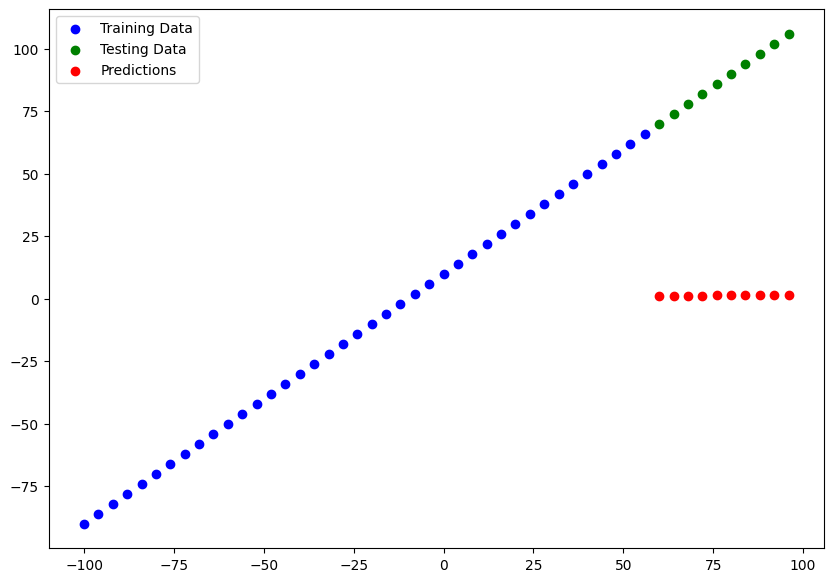

In [52]:
y_preds_3 = model_3.predict(X_test)
plot_prediction(predictions=y_preds_3)

In [48]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=122.38518>,
 <tf.Tensor: shape=(), dtype=float32, numpy=15252.166>)

In [54]:
#Compare Results

# Let's create a pandas df to compare
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_2.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,8.666227,902.570679
1,model_2,29.525415,902.570679
2,model_3,122.385178,15252.166016


In [55]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do,
the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practicioner's motto: "Experiment, Experiment, Experiment". Also remember to visualize all the steps.

#### Tracking your experiments

One really good habit in machine learning modelling is to traxck the results of your experiments.
and when doing so it can be tedious if you are running several experiments.
Luckily there are tools
* Tensorboard - a component of the Tensorflow library to help track modelling experiments.
* Weights and Biases - another tool.

## Saving our models

Saving our model allow us to use them outsite the jupyter notebook. To be able to use in websites and mobile apps


In [56]:
#Save a model using the saved model format

model_1.save("Model_2_SavedModelFormat")

INFO:tensorflow:Assets written to: Model_2_SavedModelFormat\assets


In [57]:
#Save model using the HDF5 format

model_1.save("Model_2_HDF5_Format.h5")

## Load a Model

In [59]:
loaded_SaveModel_format = tf.keras.models.load_model("Model_2_HDF5_Format.h5")
loaded_SaveModel_format.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [60]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


# Larger Example

In [61]:
#Importing libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [62]:
#Read the insurance dataset

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [65]:
#OneHotEncode
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [66]:
#Create X and y (featues and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [67]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [68]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [72]:
X_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [74]:
#Build Neural network
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=["mae"])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 8704.5986 - mae: 8704.5986
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7877.9980 - mae: 7877.9980
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7567.6865 - mae: 7567.6865
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7605.0386 - mae: 7605.0386
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7718.4116 - mae: 7718.4116
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7634.9849 - mae: 7634.9849
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 7531.3369 - mae: 7531.3369
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7722.1553 - mae: 7722.1553
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7575.5918 - mae: 7575.5918
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7675.9102 - mae: 7675.9102

In [76]:
#Check the results on the insurance model on the test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 7089.2505 - mae: 7089.2505


[7089.25048828125, 7089.25048828125]

In [84]:
#Let's improve model
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 11ms/step - loss: 13310.1689 - mae: 13310.1689
Epoch 2/100
34/34 [==============================] - 0s 11ms/step - loss: 13144.8672 - mae: 13144.8672
Epoch 3/100
34/34 [==============================] - 0s 15ms/step - loss: 12794.5488 - mae: 12794.5488
Epoch 4/100
34/34 [==============================] - 0s 11ms/step - loss: 12096.0938 - mae: 12096.0938
Epoch 5/100
34/34 [==============================] - 0s 11ms/step - loss: 10927.0195 - mae: 10927.0195
Epoch 6/100
34/34 [==============================] - 0s 11ms/step - loss: 9458.2256 - mae: 9458.2256
Epoch 7/100
34/34 [==============================] - 0s 11ms/step - loss: 8146.3140 - mae: 8146.3140
Epoch 8/100
34/34 [==============================] - 0s 13ms/step - loss: 7541.8521 - mae: 7541.8521
Epoch 9/100
34/34 [==============================] - 0s 10ms/step - loss: 7447.7471 - mae: 7447.7471
Epoch 10/100
34/34 [==============================] - 0s 9ms/step - loss: 7427.18

In [85]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 4801.7056 - mae: 4801.7056


[4801.70556640625, 4801.70556640625]

insurance_model_2 added new layer of 100 neurons, proceed to change optimizer to `Adam` and ran test. Results improved.

In [90]:
#New Experiment, train for longer

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 7ms/step - loss: 13294.0312 - mae: 13294.0312
Epoch 2/500
34/34 [==============================] - 0s 7ms/step - loss: 13141.6514 - mae: 13141.6514
Epoch 3/500
34/34 [==============================] - 0s 7ms/step - loss: 12832.0088 - mae: 12832.0088
Epoch 4/500
34/34 [==============================] - 0s 7ms/step - loss: 12225.7402 - mae: 12225.7402
Epoch 5/500
34/34 [==============================] - 0s 7ms/step - loss: 11178.9023 - mae: 11178.9023
Epoch 6/500
34/34 [==============================] - 0s 7ms/step - loss: 9749.1514 - mae: 9749.1514
Epoch 7/500
34/34 [==============================] - 0s 8ms/step - loss: 8340.8701 - mae: 8340.8701
Epoch 8/500
34/34 [==============================] - 0s 8ms/step - loss: 7573.5493 - mae: 7573.5493
Epoch 9/500
34/34 [==============================] - 0s 7ms/step - loss: 7421.9473 - mae: 7421.9473
Epoch 10/500
34/34 [==============================] - 0s 7ms/step - loss: 7399.5161 - mae:

34/34 [==============================] - 0s 8ms/step - loss: 5807.6606 - mae: 5807.6606
Epoch 83/500
34/34 [==============================] - 0s 8ms/step - loss: 5778.6094 - mae: 5778.6094
Epoch 84/500
34/34 [==============================] - 0s 8ms/step - loss: 5742.8682 - mae: 5742.8682
Epoch 85/500
34/34 [==============================] - 0s 8ms/step - loss: 5714.2368 - mae: 5714.2368
Epoch 86/500
34/34 [==============================] - 0s 9ms/step - loss: 5679.8066 - mae: 5679.8066
Epoch 87/500
34/34 [==============================] - 0s 7ms/step - loss: 5642.2202 - mae: 5642.2202
Epoch 88/500
34/34 [==============================] - 0s 7ms/step - loss: 5605.0679 - mae: 5605.0679
Epoch 89/500
34/34 [==============================] - 0s 7ms/step - loss: 5565.7305 - mae: 5565.7305
Epoch 90/500
34/34 [==============================] - 0s 7ms/step - loss: 5521.9019 - mae: 5521.9019
Epoch 91/500
34/34 [==============================] - 0s 7ms/step - loss: 5482.0894 - mae: 5482.0894
Epo

34/34 [==============================] - 0s 9ms/step - loss: 3604.3157 - mae: 3604.3157
Epoch 243/500
34/34 [==============================] - 0s 9ms/step - loss: 3601.4968 - mae: 3601.4968
Epoch 244/500
34/34 [==============================] - 0s 9ms/step - loss: 3614.4910 - mae: 3614.4910
Epoch 245/500
34/34 [==============================] - 0s 9ms/step - loss: 3599.4272 - mae: 3599.4272
Epoch 246/500
34/34 [==============================] - 0s 8ms/step - loss: 3595.5154 - mae: 3595.5156
Epoch 247/500
34/34 [==============================] - 0s 8ms/step - loss: 3593.9482 - mae: 3593.9482
Epoch 248/500
34/34 [==============================] - 0s 8ms/step - loss: 3608.5884 - mae: 3608.5884
Epoch 249/500
34/34 [==============================] - 0s 9ms/step - loss: 3595.2336 - mae: 3595.2336
Epoch 250/500
34/34 [==============================] - 0s 8ms/step - loss: 3590.6675 - mae: 3590.6675
Epoch 251/500
34/34 [==============================] - 0s 9ms/step - loss: 3586.2007 - mae: 3586

34/34 [==============================] - 0s 8ms/step - loss: 3482.3840 - mae: 3482.3840
Epoch 403/500
34/34 [==============================] - 0s 7ms/step - loss: 3482.8813 - mae: 3482.8813
Epoch 404/500
34/34 [==============================] - 0s 7ms/step - loss: 3481.7366 - mae: 3481.7366
Epoch 405/500
34/34 [==============================] - 0s 9ms/step - loss: 3475.8950 - mae: 3475.8950
Epoch 406/500
34/34 [==============================] - 0s 8ms/step - loss: 3482.7126 - mae: 3482.7126
Epoch 407/500
34/34 [==============================] - 0s 8ms/step - loss: 3480.6477 - mae: 3480.6477
Epoch 408/500
34/34 [==============================] - 0s 8ms/step - loss: 3480.9338 - mae: 3480.9338
Epoch 409/500
34/34 [==============================] - 0s 7ms/step - loss: 3478.9763 - mae: 3478.9763
Epoch 410/500
34/34 [==============================] - 0s 8ms/step - loss: 3477.5354 - mae: 3477.5354
Epoch 411/500
34/34 [==============================] - 0s 7ms/step - loss: 3489.1570 - mae: 3489

In [87]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 9ms/step - loss: 3497.4463 - mae: 3497.4463


[3497.4462890625, 3497.4462890625]

Text(0.5, 0, 'epochs')

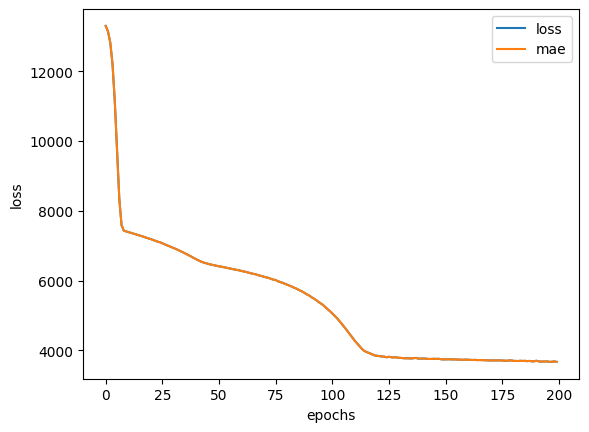

In [89]:
# Plot History (also known as loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.
If you are not sure on which to use you could try both and see which performs better.

In [91]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<AxesSubplot:ylabel='Frequency'>

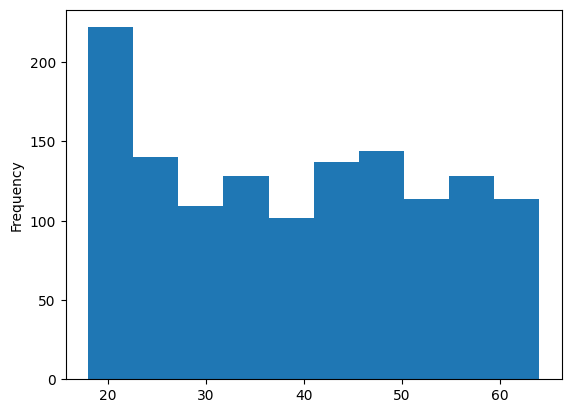

In [92]:
X["age"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

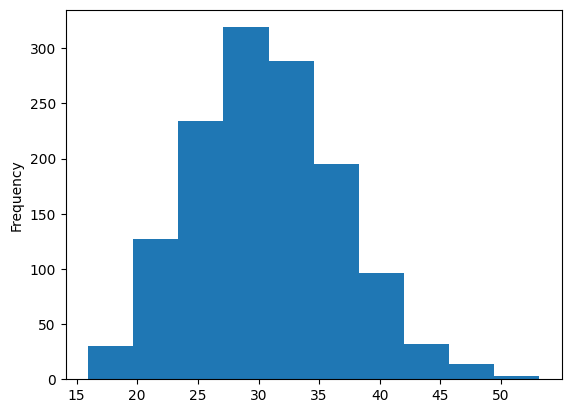

In [93]:
X["bmi"].plot(kind="hist")

In [94]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe

insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
#To prepare our data we can use some classes from Scikit Learn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
                            (MinMaxScaler(),["age","bmi","children"]), #turn all values in these columns between 0 and 1
                            (OneHotEncoder(handle_unknown="ignore"), ["sex","smoker","region"])
                            )

# Create X & y

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training Data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder()
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [103]:
# What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [104]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [105]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has been normalized and HotEncoded and is ready for a Neural Network

In [107]:
#Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics=["mae"])

insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 13343.6338 - mae: 13343.6338
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13335.5596 - mae: 13335.5596
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13316.1416 - mae: 13316.1416
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 13275.0957 - mae: 13275.0957
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13200.9492 - mae: 13200.9492
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 13082.3066 - mae: 13082.3066
Epoch 7/100
34/34 [==============================] - 0s 8ms/step - loss: 12908.8145 - mae: 12908.8145
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 12670.3232 - mae: 12670.3232
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 12356.5596 - mae: 12356.5596
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 11961.90

In [108]:
#Evaluate model using normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 3437.7068 - mae: 3437.7068


[3437.706787109375, 3437.706787109375]